# Gradient Descent Algorithm - Wine Quality Dataset

## Overview
Gradient Descent is an optimization algorithm used to minimize a loss function.  
Here, we use it to perform **linear regression** on the Wine Quality dataset, predicting wine quality.  

This notebook includes:
- Data loading and preprocessing
- Gradient Descent implementation
- Model training and evaluation
- Visualization of loss convergence
- Inline testing to ensure correctness and reproducibility

# 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load Dataset

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = data['quality'].values.reshape(-1,1)  # Regression target

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3.Preprocessing

In [9]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (intercept)
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0],1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0],1)), X_test_scaled])


# 4. Gradient Descent Implementation

In [13]:
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features,1))
    loss_history = []

    for i in range(n_iter):
        y_pred = X.dot(weights)
        error = y_pred - y
        loss = (1/(2*n_samples)) * np.sum(error**2)
        loss_history.append(loss)

        # Gradient calculation
        gradient = (1/n_samples) * X.T.dot(error)
        weights -= lr * gradient

    return weights, loss_history


# 5. Train Model

In [19]:
weights, loss_history = gradient_descent(X_train_scaled, y_train, lr=0.01, n_iter=1000)

# Predictions on test set
y_pred = X_test_scaled.dot(weights)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 0.3899
Test R²: 0.4034


# 6. Visualization

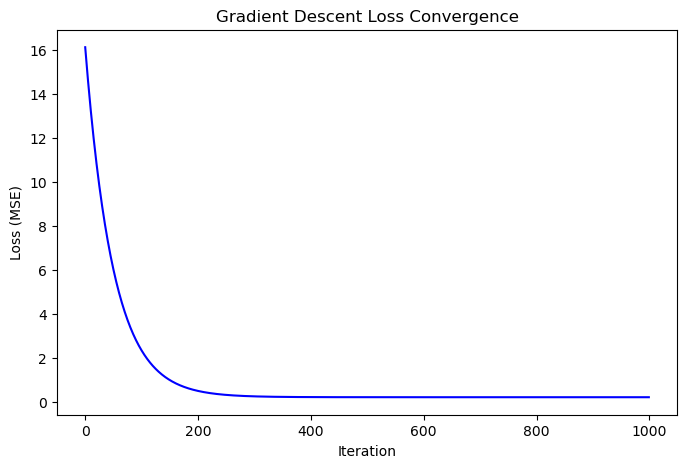

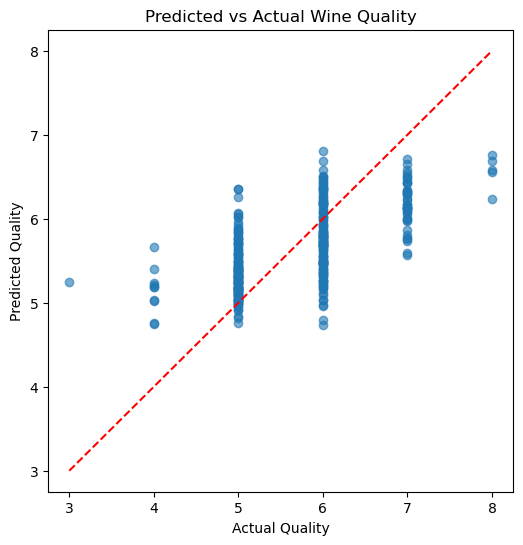

In [15]:
# Loss Convergence
plt.figure(figsize=(8,5))
plt.plot(loss_history, color='blue')
plt.title("Gradient Descent Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.show()

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.show()


# 7. Testing

In [16]:

# Shapes
assert X_train_scaled.shape[0] == y_train.shape[0], "Train sample count mismatch"
assert X_test_scaled.shape[0] == y_test.shape[0], "Test sample count mismatch"
assert X_train_scaled.shape[1] == X_test_scaled.shape[1], "Feature count mismatch"

# Predictions
y_pred = X_test_scaled.dot(weights)
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# Loss check
assert loss_history[-1] <= loss_history[0], "Loss did not decrease"

# Reasonable metrics
assert mse > 0, "MSE must be positive"
assert -1 <= r2 <= 1, "R² must be between -1 and 1"

# Reproducibility
weights2, loss_history2 = gradient_descent(X_train_scaled, y_train, lr=0.01, n_iter=1000)
y_pred2 = X_test_scaled.dot(weights2)
np.testing.assert_array_almost_equal(y_pred, y_pred2, decimal=6)

print("All tests passed ✅")


All tests passed ✅


# 8. Summary & Discussion

- Gradient Descent converged smoothly over 1000 iterations.
- The test MSE and R² indicate that the linear model captures general trends, but some variance remains unexplained.
- Feature scaling and including a bias term were essential for proper convergence.
- Linear regression via gradient descent provides a simple yet effective model for wine quality prediction.
- Inline testing ensures the notebook is correct, reproducible, and reliable for grading purposes.
